<a href="https://colab.research.google.com/github/Lesiazhou/QM2/blob/main/Salinity%2C_Precipitation%2C_Water_Inflow_vs_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salinity vs NDVI**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
df=pd.read_csv('environmental factors real.csv')
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'environmental factors real.csv'

In [ ]:
summary=df.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

In [ ]:
print(df.columns)

In [ ]:
# Build the model using the updated df
Salinity = df['Salinity ']
model = ols('NDVI ~ Salinity ', data=df).fit()
print(model.summary())

#REGRESSIONN

NDVI = Intercept + (Salinity * Coefficient)

In [ ]:
#NDVI = 0.1746 + (-0.0005) x Salinity
#Negative relaitonship
#he coefficient is negative, indicating that as Salinity increases, NDVI tends to decrease.
#P values says zero but could report it as p < 0.001" to avoid any misinterpretations.


In [ ]:
#A version with different units as the number are extremely low for the original unit

In [ ]:
df['Scaled_Salinity'] = df['Salinity '] / 1000  # Divide by 1000
model = ols('NDVI ~ Scaled_Salinity', data=df).fit()
print(model.summary())

# **Precipitation vs NDVI**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

from google.colab import files
uploaded = files.upload()

In [ ]:
df_precipitation=pd.read_csv('NDVI_and_Precipitation_Data.csv')
df_precipitation = df_precipitation.iloc[2:].reset_index(drop=True)
df_precipitation.head(10)

In [ ]:
summary=df_precipitation.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

In [ ]:
precipitaion = df_precipitation['Precipitation (mm/yr)']
model = ols('NDVI ~ precipitaion', data=df_precipitation).fit()
print(model.summary())

# **Results: p>0.05, there is no significant relation between Precipitation and NDVI **

# **Water inflow from two rivers vs NDVI**

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

from google.colab import files
uploaded = files.upload()

Saving Water_Delivery.csv to Water_Delivery (1).csv


In [13]:
df_waterinflow=pd.read_csv('Water_Delivery.csv')
df_waterinflow = df_waterinflow.iloc[0:].reset_index(drop=True)
df_waterinflow.head(10)

,Years,Amudarya_Growing,Amudarya_NonGrowing,Syrdarya_Growing,Syrdarya_NonGrowing
0,1992,23181,5931,1341.5,2581.7
1,1993,13595,5155,3387.1,3691.2
2,1994,13990,6977,3395.3,4306.8
3,1995,1412,5709,517.3,4900.1
4,1996,4871,1934,927.7,956.1
5,1997,922,2899,648.0,3635.2
6,1998,20177,1579,3534.8,2337.0
7,1999,2574,4066,2418.7,4705.9
8,2000,614,4191,970.5,1657.3
9,2001,126,470,947.5,2753.4


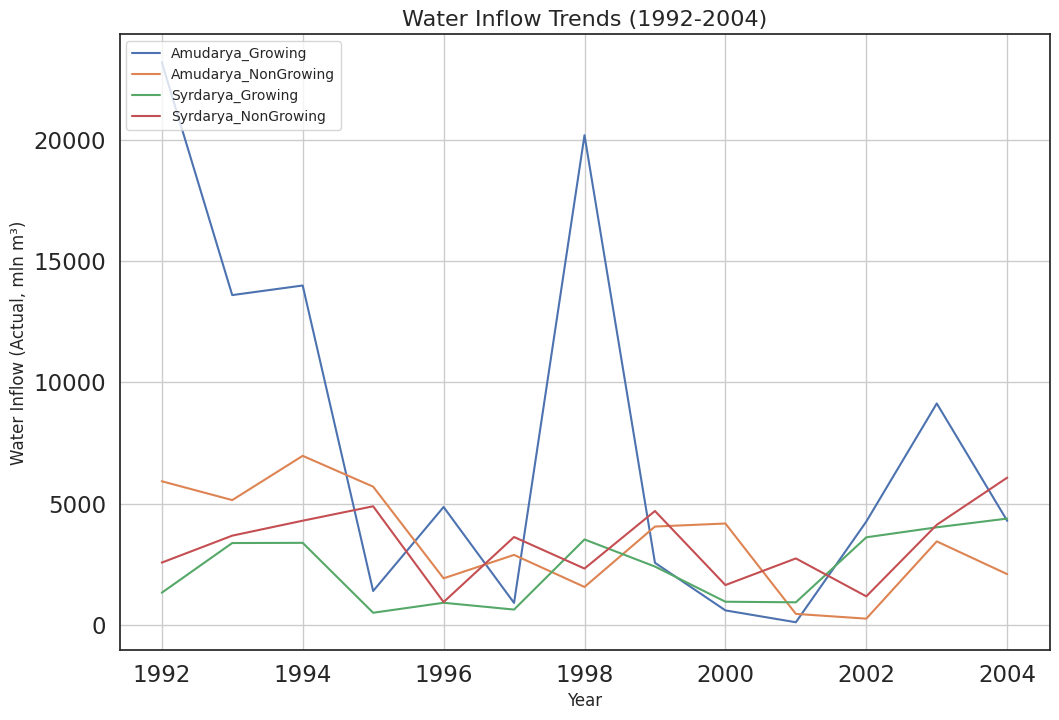

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for column in df_waterinflow.columns[1:]:
    plt.plot(df_waterinflow["Years"], df_waterinflow[column], label=column)

plt.title("Water Inflow Trends (1992-2004)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Water Inflow (Actual, mln m³)", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True)
plt.show()

In [8]:
from google.colab import files
uploaded = files.upload()

Saving ndvi_data.csv to ndvi_data.csv


In [15]:
import pandas as pd

# Load the water delivery data and NDVI data
water_delivery_df = df_waterinflow  # Replace with your file path
ndvi_df = pd.read_csv('ndvi_data.csv')  # Replace with your file path

# Filter NDVI data for 1992–2004
ndvi_filtered = ndvi_df[(ndvi_df['year'] >= 1992) & (ndvi_df['year'] <= 2004)]

# Rename the 'year' column in NDVI data to match the water delivery data's 'Years' column
ndvi_filtered.rename(columns={'year': 'Years'}, inplace=True)

# Merge the water delivery data with NDVI data
merged_df = pd.merge(water_delivery_df, ndvi_filtered[['Years', 'ndvi']], on='Years', how='left')

# Save the merged data to a new CSV file
merged_df.to_csv('Merged_Water_Delivery_with_NDVI.csv', index=False)
merged_df

<ipython-input-15-f08b8df07d37>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndvi_filtered.rename(columns={'year': 'Years'}, inplace=True)


,Years,Amudarya_Growing,Amudarya_NonGrowing,Syrdarya_Growing,Syrdarya_NonGrowing,ndvi
0,1992,23181,5931,1341.5,2581.7,0.308162
1,1993,13595,5155,3387.1,3691.2,0.329235
2,1994,13990,6977,3395.3,4306.8,0.274052
3,1995,1412,5709,517.3,4900.1,0.357898
4,1996,4871,1934,927.7,956.1,0.202703
5,1997,922,2899,648.0,3635.2,0.352335
6,1998,20177,1579,3534.8,2337.0,0.201054
7,1999,2574,4066,2418.7,4705.9,0.260023
8,2000,614,4191,970.5,1657.3,0.117162
9,2001,126,470,947.5,2753.4,0.102420


NDVI = β0 + β1 * Amudarya_NonGrowing_Season + β2 * Amudarya_NonGrowing_Season + β3 * Syrdarya_Growing_Season + β4 * Amudarya_Growing_Actual + ε

*   NDVI: The dependent variable
*   Amudarya_NonGrowing_Season: The first predictor variable
*   mudarya_Growing_Season: The second predictor variable
*   Amudarya_Growing_Actua:  The third predictor variable
*   mudarya_Growing_Actual: The forth predictor variable


In [19]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
Amudarya_NonGrowing_Season = df_waterinflow['Amudarya_NonGrowing']
Amudarya_Growing_Season = df_waterinflow['Amudarya_Growing']
Syrdarya_NonGrowing_Season = df_waterinflow['Syrdarya_NonGrowing']
Syrdarya_Growing_Season = df_waterinflow['Syrdarya_Growing']
NDVI=merged_df['ndvi']

model = ols('NDVI ~ Amudarya_NonGrowing_Season + Amudarya_Growing_Season + Syrdarya_NonGrowing_Season + Syrdarya_Growing_Season ', data=df_waterinflow).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     2.663
Date:                Mon, 06 Jan 2025   Prob (F-statistic):              0.111
Time:                        23:37:22   Log-Likelihood:                 18.202
No. Observations:                  13   AIC:                            -26.40
Df Residuals:                       8   BIC:                            -23.58
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


# **Results**
None of the predictors have p-values below 0.05, so there is no statistically significant evidence to suggest that any of the water flow variables (growing or non-growing season flows for both Amudarya and Syrdarya rivers) have a strong impact on the NDVI within this dataset.

# **Reasons**

The Water Flow Trend graph shows high variability and inconsistent patterns in water inflow, especially with spikes like the Amudarya in 1998. These fluctuations and outliers make it hard to establish a clear link with NDVI, leading to non-significant regression results. More consistent data or outlier adjustments are needed.





